In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# downloading the data set
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2023-03-05 17:51:42--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.251.17, 13.226.251.24, 13.226.251.107, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.251.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.1s    

2023-03-05 17:51:42 (33.5 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
# loading the data set inside a varibale
df = pd.read_csv('netflix.csv')
df.head(20)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
# converting nested columns to list
df['cast']=df['cast'].str.split(',')
df['country']=df['country'].str.split(',')
df['listed_in']=df['listed_in'].str.split(',')
df['director']=df['director'].str.split(',')

In [ ]:
# converting identified list columns to long format
df = df.explode('cast')
df['cast']=df['cast'].str.strip()
df = df.explode('country')
df['country']=df['country'].str.strip()
df = df.explode('listed_in')
df['listed_in']=df['listed_in'].str.strip()
df = df.explode('director')
df['director']=df['director'].str.strip()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202065 non-null  object
 1   type          202065 non-null  object
 2   title         202065 non-null  object
 3   director      151422 non-null  object
 4   cast          199916 non-null  object
 5   country       190168 non-null  object
 6   date_added    201907 non-null  object
 7   release_year  202065 non-null  int64 
 8   rating        201998 non-null  object
 9   duration      202062 non-null  object
 10  listed_in     202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
#Replacing null values from director, cast, country, date_added & rating columns
df['director'].fillna('unknown',inplace=True)
df['cast'].fillna('unknown',inplace=True)
df['country'].fillna('All Countries',inplace=True)  ## asuming if country has null values, the Netflix special has released in every country


In [ ]:
#find duplicate values
df.duplicated().sum()

55

In [ ]:
#removing all the duplicates generated
df.drop_duplicates(keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202010 non-null  object
 1   type          202010 non-null  object
 2   title         202010 non-null  object
 3   director      202010 non-null  object
 4   cast          202010 non-null  object
 5   country       202010 non-null  object
 6   date_added    201852 non-null  object
 7   release_year  202010 non-null  int64 
 8   rating        201943 non-null  object
 9   duration      202007 non-null  object
 10  listed_in     202010 non-null  object
 11  description   202010 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
#content type offered by Netflix
#table creation to analyse comparision b/w tv shows and movies over a period of time and discarding the the rows with Null rows of date_added column
temp_table1=df.loc[:,['show_id','type','title','date_added','release_year','rating','duration']].drop_duplicates(keep='first')
temp_table1['date_added']=pd.to_datetime(temp_table1['date_added'])
temp_table1['year_of_date_added']=temp_table1['date_added'].dt.year
temp_table1.dropna(inplace=True)
temp_table1['year_of_date_added']=temp_table1['year_of_date_added'].astype(int)
temp_table1.head()

,show_id,type,title,date_added,release_year,rating,duration,year_of_date_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,2021
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season,2021
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season,2021
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons,2021


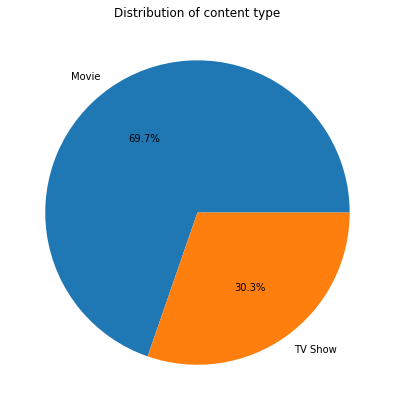

In [ ]:
#distribution of content type
plt.figure(figsize=(7,7))
plt.pie(temp_table1['type'].value_counts(),labels=temp_table1['type'].unique(),autopct='%1.1f%%')
plt.title('Distribution of content type')
plt.show()

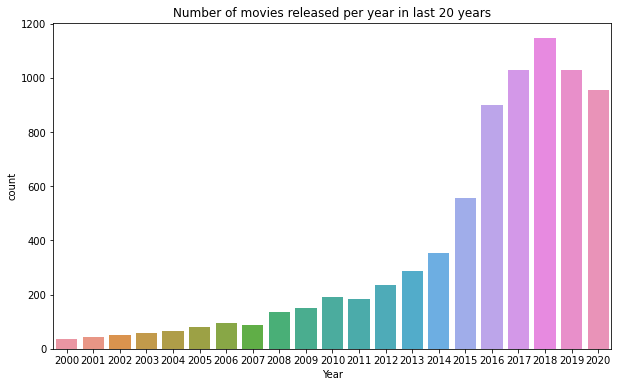

In [ ]:
#How has the number of title released per year changed over the last 20-30 years,plt.figure(figsize=(10,10))
plt.figure(figsize=(10,6))
sns.countplot(data=temp_table1.loc[(temp_table1['release_year'] >= 2000)&(temp_table1['release_year']<=2020),['release_year']],x='release_year')
plt.xlabel('Year')
plt.title('Number of movies released per year in last 20 years')
plt.show()

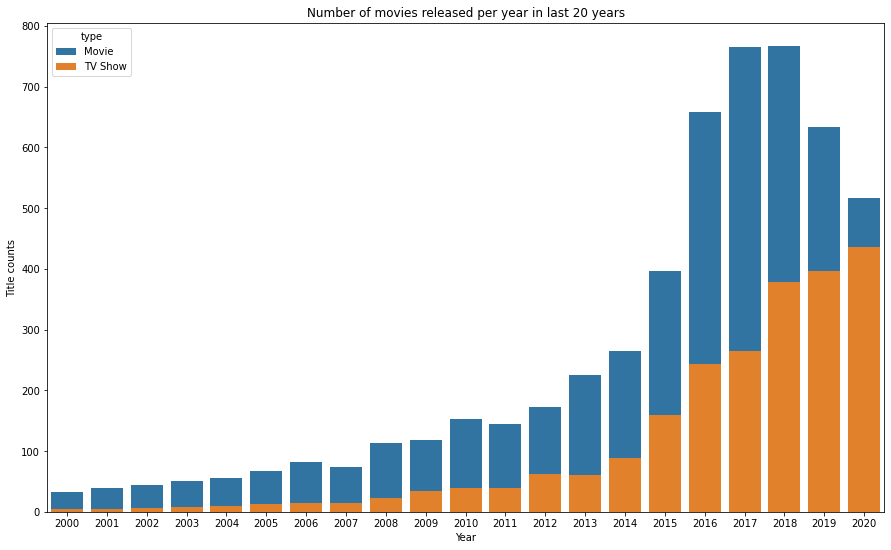

In [ ]:
#How has the number of movies amd TV Show released per year changed over the last 20-30 years
plt.figure(figsize=(15,9))
sns.countplot(data=temp_table1.loc[(temp_table1['release_year'] >= 2000)&(temp_table1['release_year']<=2020),['release_year']],x='release_year',hue=temp_table1['type'],dodge=False)
plt.xlabel('Year')
plt.ylabel('Title counts')
plt.title('Number of movies released per year in last 20 years')
plt.show()

In [ ]:
#get release year vs no. of seasons plot
temp_table1.loc[temp_table1['type']=='TV Show']['duration'].value_counts()[:5]

1 Season     1791
2 Seasons     421
3 Seasons     198
4 Seasons      94
5 Seasons      64
Name: duration, dtype: int64

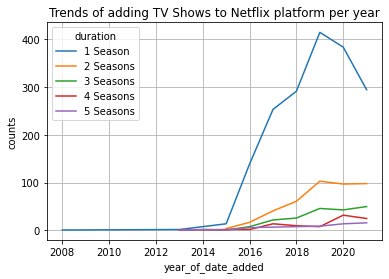

In [ ]:
data=temp_table1.loc[(temp_table1['type']=='TV Show')&((temp_table1['duration'].isin(temp_table1.loc[temp_table1['type']=='TV Show']['duration'].value_counts()[:5].index.tolist()))),['year_of_date_added','duration','show_id']].groupby(['duration','year_of_date_added'])['show_id'].count().reset_index(name='counts')
sns.lineplot(data=data,x='year_of_date_added',y='counts',hue='duration')
plt.title('Trends of adding TV Shows to Netflix platform per year')
plt.grid()
plt.show()

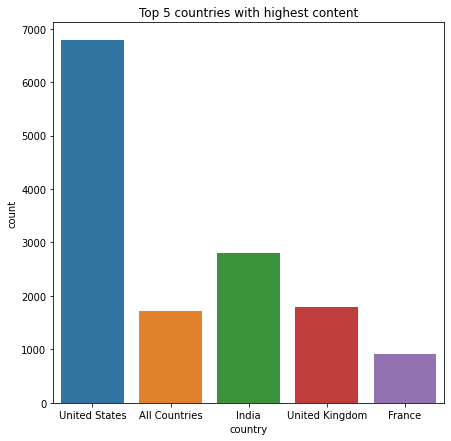

In [ ]:
# Top countries with Maximum number of Netflix Content
country=df.loc[:,['title','type','country','listed_in']]
country.drop_duplicates(keep='first',inplace=True)
top_five_countries = country['country'].value_counts()[:5].index.tolist()
plt.figure(figsize=(7,7))
sns.countplot(data=country[country['country'].isin(top_five_countries)],x='country')
plt.title('Top 5 countries with highest content')
plt.show()

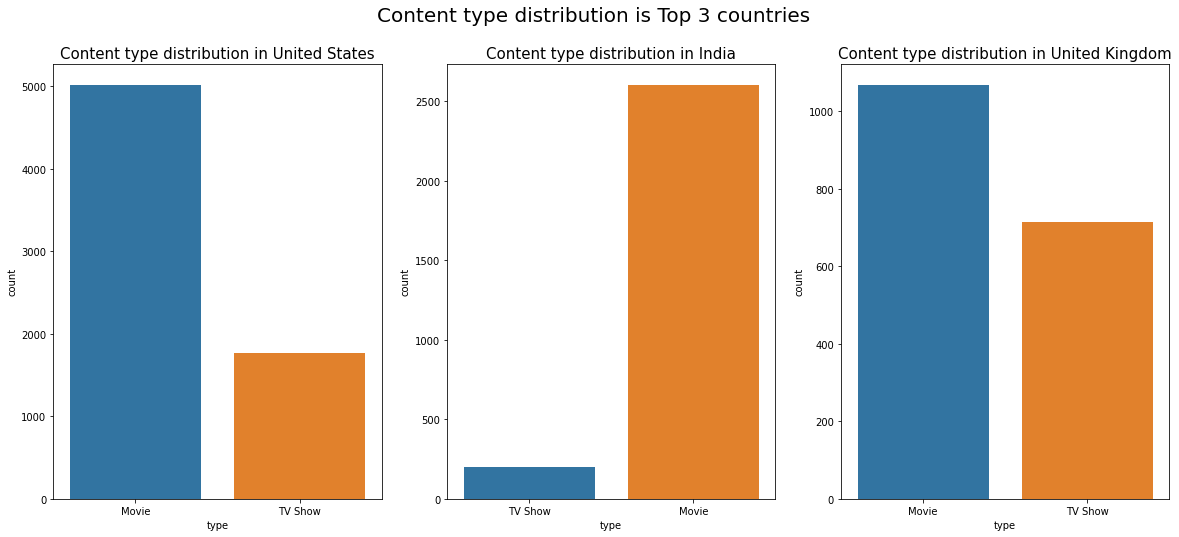

In [ ]:
#Content type distribution in Top 3 countries
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle('Content type distribution is Top 3 countries',fontsize=20)
top_3_countries = country['country'].value_counts()[:3].index.tolist()
for i, ax in zip(top_3_countries,axes):
    sns.countplot(data=country.loc[country['country']==i],x='type',ax=ax)
    ax.set_title('Content type distribution in {country}'.format(country=i),fontsize=15)

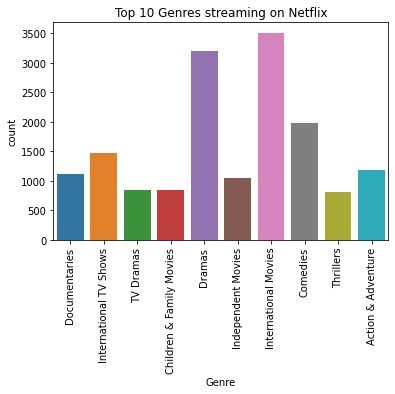

In [ ]:
#top 10 genres streaming on netflix
genre = country['listed_in'].value_counts()[:10].index.tolist()
sns.countplot(data=country[country['listed_in'].isin(genre)],x='listed_in')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.title('Top 10 Genres streaming on Netflix')
plt.show()

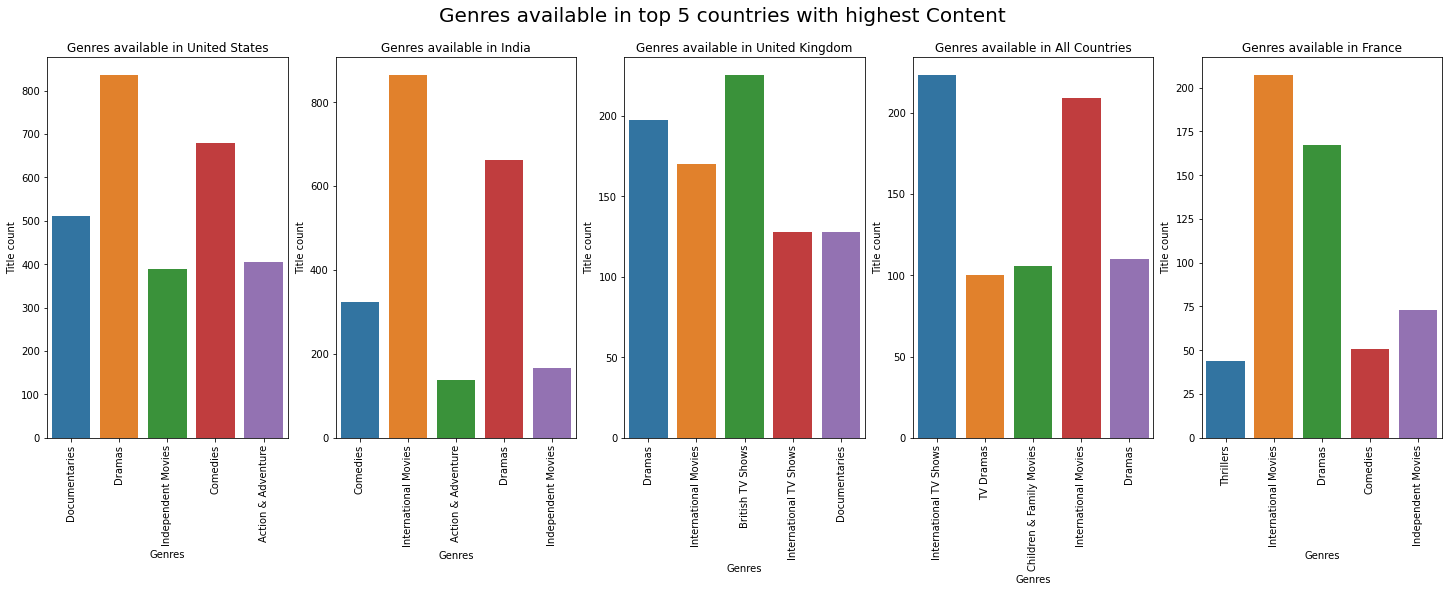

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(25,7))
fig.suptitle('Genres available in top 5 countries with highest Content',fontsize='20')
for i, ax in zip(top_five_countries,axes.flat):
  top_5_genre = country[country['country']==i]['listed_in'].value_counts()[:5].index.tolist()
  sns.countplot(data = country.loc[(country['country']==i)&(country['listed_in'].isin(top_5_genre))],x='listed_in',ax=ax)
  ax.tick_params(axis='x',rotation=90)
  ax.set_title('Genres available in {countries}'.format(countries=i))
  ax.set(xlabel='Genres',ylabel='Title count')
plt.show()

In [ ]:
#rating vs type analysis
rating=df.loc[:,['title','type','rating']]
rating.drop_duplicates(keep='first',inplace=True)
rating.dropna(inplace=True)
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8803 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   8803 non-null   object
 1   type    8803 non-null   object
 2   rating  8803 non-null   object
dtypes: object(3)
memory usage: 275.1+ KB


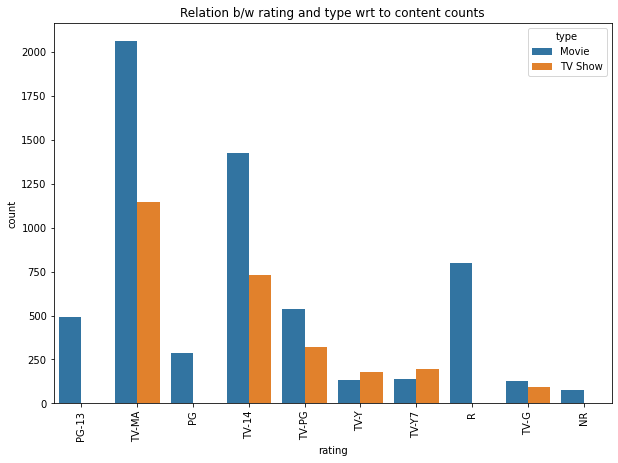

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Relation b/w rating and type wrt to content counts')
sns.countplot(data= rating[rating['rating'].isin(rating['rating'].value_counts()[:10].index.tolist())],x='rating',hue='type')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#poplular director and country
director=df.loc[:,['title','director','country']].drop_duplicates(keep='first')
director.dropna(inplace=True)
director['director'].value_counts()

unknown                   2970
Rajiv Chilaka               22
Jan Suter                   21
Raúl Campos                 19
Steven Spielberg            18
                          ... 
YC Tom Lee                   1
Manu Ashokan                 1
Anita Udeep                  1
Alberto Arnaut Estrada       1
Mozez Singh                  1
Name: director, Length: 4994, dtype: int64

Text(0.5, 1.0, 'Top 10 known directors and their content counts in Netflix')

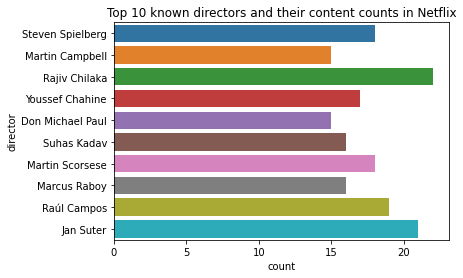

In [ ]:
sns.countplot(data=director[(director['director']!= 'unknown')&(director['director'].isin(director['director'].value_counts()[1:11].index.tolist()))],y='director')
plt.title('Top 10 known directors and their content counts in Netflix')

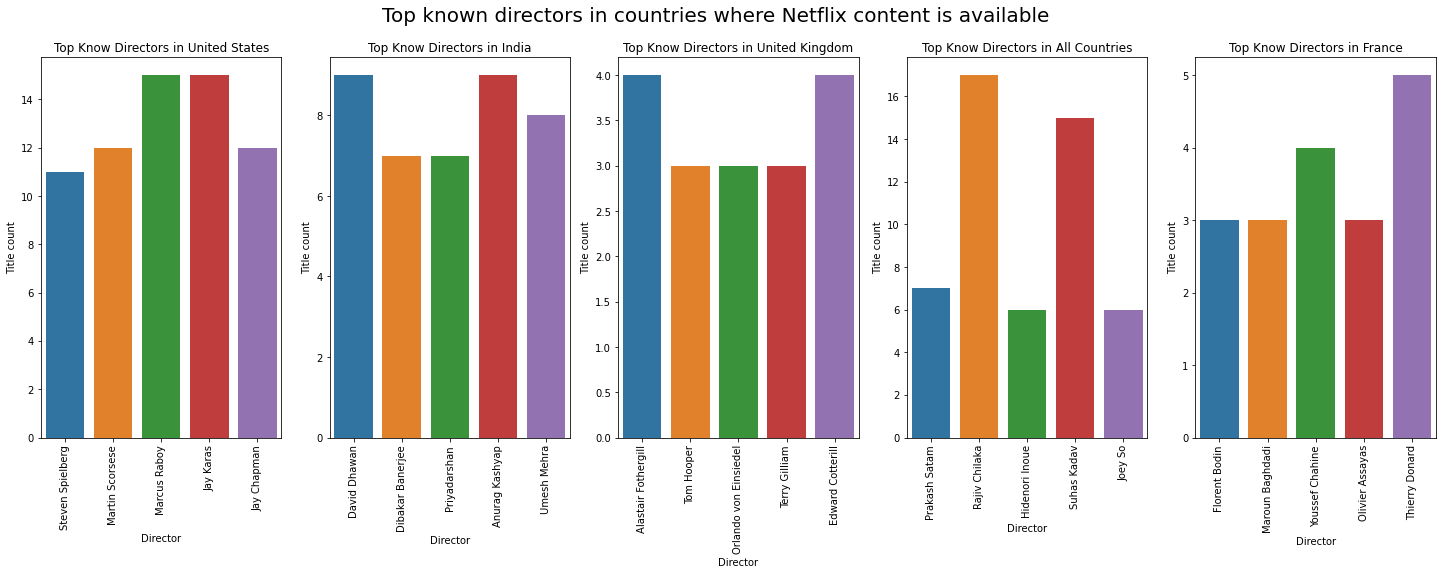

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(25,7))
fig.suptitle('Top known directors in countries where Netflix content is available',fontsize='20')
for i, ax in zip(top_five_countries,axes.flat):
  top_5_directors = director[director['country']==i]['director'].value_counts()[1:6].index.tolist()
  sns.countplot(data = director.loc[(director['country']==i)&(director['director'].isin(top_5_directors))],x='director',ax=ax)
  ax.tick_params(axis='x',rotation=90)
  ax.set_title('Top Know Directors in {countries}'.format(countries=i))
  ax.set(xlabel='Director',ylabel='Title count')
plt.show()

In [ ]:
#actors and country combination
actor=df.loc[:,['title','cast','country']].drop_duplicates(keep='first')
actor.dropna(inplace=True)
actor['cast'].value_counts()

unknown                  1006
Anupam Kher                46
David Attenborough         45
Vincent Tong               42
John Cleese                40
                         ... 
Wang Yizhe                  1
Wang Herun                  1
Liza  Treyger               1
Anthony Salerno             1
Chittaranjan Tripathy       1
Name: cast, Length: 36440, dtype: int64

Text(0.5, 1.0, 'Top 10 known Actors and their content counts in Netflix')

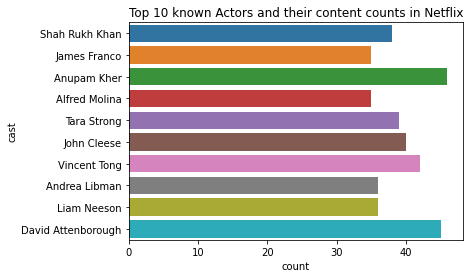

In [ ]:
sns.countplot(data=actor[(actor['cast']!= 'unknown')&(actor['cast'].isin(actor['cast'].value_counts()[1:11].index.tolist()))],y='cast')
plt.title('Top 10 known Actors and their content counts in Netflix')

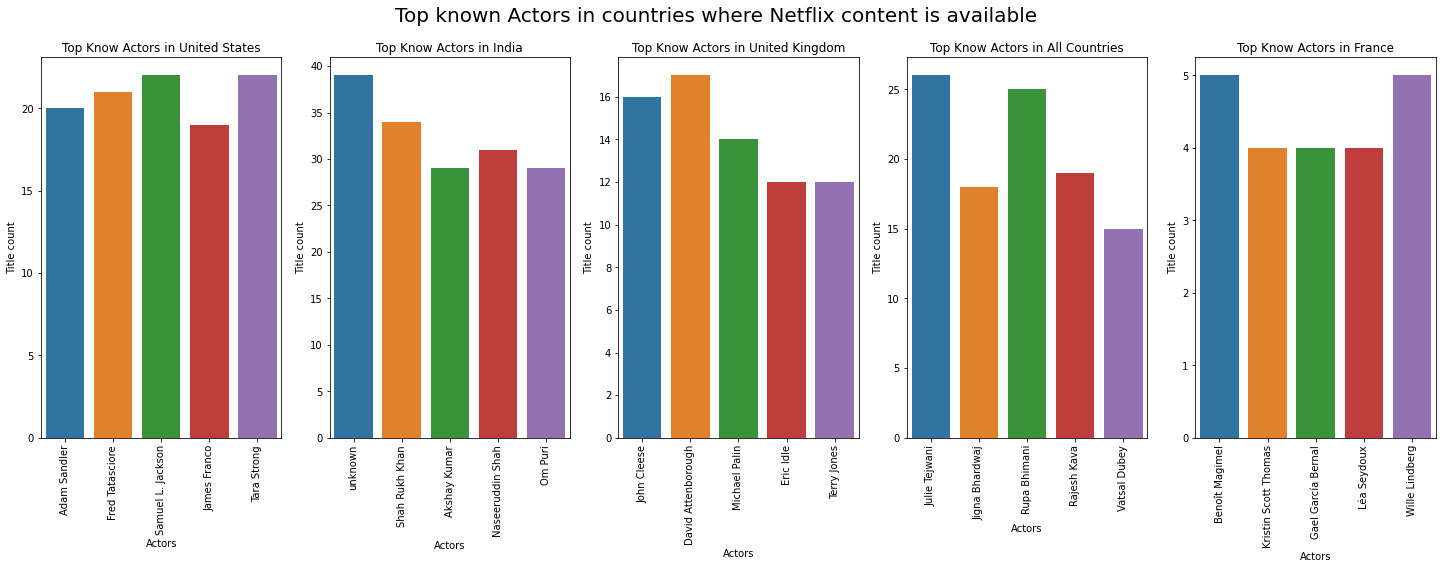

In [ ]:
fig,axes=plt.subplots(1,5,figsize=(25,7))
fig.suptitle('Top known Actors in countries where Netflix content is available',fontsize='20')
for i, ax in zip(top_five_countries,axes.flat):
  top_5_actors = actor[actor['country']==i]['cast'].value_counts()[1:6].index.tolist()
  sns.countplot(data = actor.loc[(actor['country']==i)&(actor['cast'].isin(top_5_actors))],x='cast',ax=ax)
  ax.tick_params(axis='x',rotation=90)
  ax.set_title('Top Know Actors in {countries}'.format(countries=i))
  ax.set(xlabel='Actors',ylabel='Title count')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202010 non-null  object
 1   type          202010 non-null  object
 2   title         202010 non-null  object
 3   director      202010 non-null  object
 4   cast          202010 non-null  object
 5   country       202010 non-null  object
 6   date_added    201852 non-null  object
 7   release_year  202010 non-null  int64 
 8   rating        201943 non-null  object
 9   duration      202007 non-null  object
 10  listed_in     202010 non-null  object
 11  description   202010 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [ ]:
#What is the best time to launch a TV show?
launch = df
launch['date_added']= pd.to_datetime(launch['date_added'])
launch.dropna(inplace=True)
launch['month']=launch['date_added'].dt.month.astype(int)
launch['year']=launch['date_added'].dt.year.astype(int)
launch = launch.loc[:,['type','title','year','month']].drop_duplicates(keep='first')
launch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8790 non-null   object
 1   title   8790 non-null   object
 2   year    8790 non-null   int64 
 3   month   8790 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 343.4+ KB


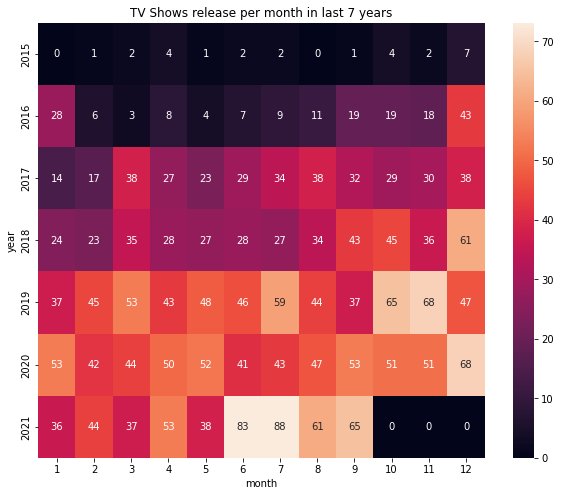

In [ ]:
plt.figure(figsize=(10,8))
launch = launch.loc[(launch['year'] >= 2015)&(launch['year'] <= 2021)&(launch['type'] == 'TV Show')]
corr_tab=pd.crosstab(index=launch['year'],columns=launch['month'])
sns.heatmap(data=corr_tab,robust=True,annot=True)
plt.title('TV Shows release per month in last 7 years')
plt.show()